# Time series in pandas

## Indexing pandas time series

### Reading and slicing times
For this exercise, we have read in the same data file using three different approaches:

* df1 = pd.read_csv(filename)
* df2 = pd.read_csv(filename, parse_dates=['Date'])
* df3 = pd.read_csv(filename, index_col='Date', parse_dates=True)

Use the .head() and .info() methods in the IPython Shell to inspect the DataFrames. 

In [1]:
import pandas as pd

df1 = pd.read_csv('weather.csv')
df2 = pd.read_csv('weather.csv', parse_dates=['Date'])
df3 = pd.read_csv('weather.csv', index_col='Date', parse_dates=True)

In [2]:
df1.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
Date           8759 non-null object
dtypes: float64(3), object(1)
memory usage: 273.8+ KB


In [4]:
df2.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,2010-01-01 00:00:00
1,44.6,37.1,1.0,2010-01-01 01:00:00
2,44.1,36.9,1.0,2010-01-01 02:00:00
3,43.8,36.9,1.0,2010-01-01 03:00:00
4,43.5,36.8,1.0,2010-01-01 04:00:00


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
Date           8759 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 273.8 KB


In [6]:
df3.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


In [8]:
df3.loc['2010-Aug-01']

,Temperature,DewPoint,Pressure
Date,,,
2010-08-01 00:00:00,79.0,70.8,1.0
2010-08-01 01:00:00,77.4,71.2,1.0
2010-08-01 02:00:00,76.4,71.3,1.0
2010-08-01 03:00:00,75.7,71.4,1.0
2010-08-01 04:00:00,75.1,71.4,1.0
2010-08-01 05:00:00,74.6,71.3,1.0
2010-08-01 06:00:00,74.5,71.3,1.0
2010-08-01 07:00:00,76.0,72.3,1.0
2010-08-01 08:00:00,79.8,72.8,1.0




### Creating and using a DatetimeIndex
The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the pd.to_datetime() function for just this task. For example, if passed the list of strings ['2015-01-01 091234','2015-01-01 091234'] and a format specification variable, such as format='%Y-%m-%d %H%M%S, pandas will parse the string into the proper datetime elements and build the datetime objects.

In this exercise, a list of temperature data and a list of date strings has been pre-loaded for you as temperature_list and date_list respectively. Your job is to use the .to_datetime() method to build a DatetimeIndex out of the list of date strings, and to then use it along with the list of temperature data to build a pandas Series.

In [9]:
date_list = list(df1['Date'])
temperature_list = list(df1['Temperature'])

In [10]:
# Prepare a format string: time_format
time_format = '%Y%m%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)

print(time_series.head())

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64


### Partial string indexing and slicing

Pandas time series support "partial string" indexing. What this means is that even when passed only a portion of the datetime, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed.

In this exercise, a time series that contains hourly weather data has been pre-loaded for you. This data was read using the parse_dates=True option in read_csv() with index_col="Dates" so that the Index is indeed a DatetimeIndex.

All data from the 'Temperature' column has been extracted into the variable ts0. Your job is to use a variety of natural date strings to extract one or more values from ts0.

After you are done, you will have three new variables - ts1, ts2, and ts3. You can slice these further to extract only the first and last entries of each. Try doing this after your submission for more practice.

In [11]:
ts0 = time_series

# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']


In [12]:
ts1

69.0

In [13]:
ts2

2010-07-04 00:00:00    77.6
2010-07-04 01:00:00    76.3
2010-07-04 02:00:00    75.5
2010-07-04 03:00:00    74.9
2010-07-04 04:00:00    74.6
2010-07-04 05:00:00    74.2
2010-07-04 06:00:00    74.4
2010-07-04 07:00:00    76.0
2010-07-04 08:00:00    79.0
2010-07-04 09:00:00    81.8
2010-07-04 10:00:00    84.6
2010-07-04 11:00:00    86.8
2010-07-04 12:00:00    88.9
2010-07-04 13:00:00    90.1
2010-07-04 14:00:00    91.1
2010-07-04 15:00:00    91.6
2010-07-04 16:00:00    91.5
2010-07-04 17:00:00    90.7
2010-07-04 18:00:00    89.5
2010-07-04 19:00:00    87.3
2010-07-04 20:00:00    84.0
2010-07-04 21:00:00    81.8
2010-07-04 22:00:00    80.0
2010-07-04 23:00:00    78.5
dtype: float64

### Reindexing the Index

Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with NaN by default.

In this exercise, two time series data sets containing daily data have been pre-loaded for you, each indexed by dates. The first, ts1, includes weekends, but the second, ts2, does not. The goal is to combine the two data sets in a sensible way. Your job is to reindex the second data set so that it has weekends as well, and then add it to the first. When you are done, it would be informative to inspect your results.

In [14]:
ts1 = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
               index = pd.to_datetime(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-16',
               '2016-07-17']))

ts2 = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               index = pd.to_datetime(['2016-07-01', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15']))

In [15]:
# Combine ts1 + ts2
ts1 + ts2

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     4.0
2016-07-05     6.0
2016-07-06     8.0
2016-07-07    10.0
2016-07-08    12.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    16.0
2016-07-12    18.0
2016-07-13    20.0
2016-07-14    22.0
2016-07-15    24.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64

In [16]:
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)
ts1 + ts3

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     4.0
2016-07-05     6.0
2016-07-06     8.0
2016-07-07    10.0
2016-07-08    12.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    16.0
2016-07-12    18.0
2016-07-13    20.0
2016-07-14    22.0
2016-07-15    24.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64

In [17]:
# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method='ffill')
ts1 + ts4

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     4
2016-07-05     6
2016-07-06     8
2016-07-07    10
2016-07-08    12
2016-07-09    13
2016-07-10    14
2016-07-11    16
2016-07-12    18
2016-07-13    20
2016-07-14    22
2016-07-15    24
2016-07-16    25
2016-07-17    26
dtype: int64

## Resampling pandas time series
###   Resampling and frequency
Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different. Both use the concept of 'method chaining' - df.method1().method2().method3() - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next.

For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in df.resample('D').mean().

In this exercise, a data set containing hourly temperature data has been pre-loaded for you. Your job is to resample the data using a variety of aggregation methods to answer a few questions.

In [18]:
df = pd.read_csv('weather.csv', index_col='Date', parse_dates=True)
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [19]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6H').mean()
df1.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

In [20]:
# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()
df2.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

### Separating and resampling
With pandas, you can resample in different ways on different subsets of your data. For example, resampling different months of data with different aggregations. In this exercise, the data set containing hourly temperature data from the last exercise has been pre-loaded.

Your job is to resample the data using a variety of aggregation methods. The DataFrame is available in the workspace as df. You will be working with the 'Temperature' column.

In [21]:
# Extract temperature data for August: august
august = df.loc['2010-8', 'Temperature']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

august_highs.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

In [22]:
# Extract temperature data for February: february
february = df.loc['2010-2', 'Temperature']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

february_lows.head()

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64

### Rolling mean and frequency

In this exercise, some hourly weather data is pre-loaded for you. You will continue to practice resampling, this time using rolling means.

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them here.

To use the .rolling() method, you must always use method chaining, first calling .rolling() and then chaining an aggregation method after it. For example, with a Series hourly_data, hourly_data.rolling(window=24).mean() would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

Your job is to resample the data using the combination of .rolling() and .mean(). You will work with the same DataFrame df from the previous exercise.

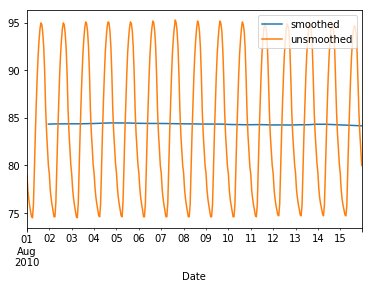

In [23]:
import matplotlib.pyplot as plt

# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()


### Resample and roll with it
As of pandas version 0.18.0, the interface for applying rolling transformations to time series has become more consistent and flexible, and feels somewhat like a groupby (If you do not know what a groupby is, don't worry, you will learn about it in the next course!).

You can now more flexibly chain together both resampling as well as rolling operations. In this exercise, the same weather data from the previous exercises has been pre-loaded for you. Your job is to extract one month of data, resample to find the daily high temperatures, and then use a rolling and aggregation operation to smooth the data.

In [24]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-Aug']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)


Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


## Manipulating pandas time series

### Method chaining and filtering
We've seen that pandas supports method chaining. This technique can be very powerful when cleaning and filtering data.

In this exercise, a DataFrame containing flight departure data for a single airline and a single airport for the month of July 2015 has been pre-loaded. Your job is to use .str() filtering and method chaining to generate summary statistics on flight delays each day to Dallas.


In [25]:
df = pd.read_csv('flight.csv', parse_dates=True, index_col=0)
df.index.name = 'Date'
df.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date,,,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN


In [26]:
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
Name: Destination Airport, dtype: float64

### Missing values and interpolation
One common application of interpolation in data analysis is to fill in missing data.

In this exercise, noisy measured data that has some dropped or otherwise missing values has been loaded. The goal is to compare two time series, and then look at summary statistics of the differences. The problem is that one of the data sets is missing data at some of the times. The pre-loaded data ts1 has value for all times, yet the data set ts2 does not: it is missing data for the weekends.

Your job is to first interpolate to fill in the data for all days. Then, compute the differences between the two data sets, now that they both have full support for all times. Finally, generate the summary statistics that describe the distribution of differences.

In [27]:
ts1

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
dtype: int64

In [28]:
ts2

2016-07-01     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
dtype: int64

In [29]:
import numpy as np

# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate('linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts2_interp - ts1)

# Generate and print summary statistics of the differences
print(differences.describe())

count    17.000000
mean      2.882353
std       1.585267
min       0.000000
25%       2.000000
50%       2.666667
75%       4.000000
max       6.000000
dtype: float64


In [30]:
ts2_interp

2016-07-01     0.000000
2016-07-02     0.333333
2016-07-03     0.666667
2016-07-04     1.000000
2016-07-05     2.000000
2016-07-06     3.000000
2016-07-07     4.000000
2016-07-08     5.000000
2016-07-09     5.333333
2016-07-10     5.666667
2016-07-11     6.000000
2016-07-12     7.000000
2016-07-13     8.000000
2016-07-14     9.000000
2016-07-15    10.000000
2016-07-16    10.000000
2016-07-17    10.000000
dtype: float64

### Time zones and conversion
Time zone handling with pandas typically assumes that you are handling the Index of the Series. In this exercise, you will learn how to handle timezones that are associated with datetimes in the column data, and not just the Index.

You will work with the flight departure dataset again, and this time you will select Los Angeles ('LAX') as the destination airport.

Here we will use a mask to ensure that we only compute on data we actually want. To learn more about Boolean masks, click here!

In [31]:
df = pd.read_csv('flight.csv')
df.columns = df.columns.str.strip()

# Buid a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'])

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')

times_tz_pacific.head()

33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]

## Visualizing pandas time series

### Plotting time series, datetime indexing
Pandas handles datetimes not only in your data, but also in your plotting.

In this exercise, some time series data has been pre-loaded. However, we have not parsed the date-like columns nor set the index, as we have done for you in the past!

The plot displayed is how pandas renders data with the default integer/positional index. Your job is to convert the 'Date' column from a collection of strings into a collection of datetime objects. Then, you will use this converted 'Date' column as your new index, and re-plot the data, noting the improved datetime awareness. After you are done, you can cycle between the two plots you generated by clicking on the 'Previous Plot' and 'Next Plot' buttons.

Before proceeding, look at the plot shown and observe how pandas handles data with the default integer index. Then, inspect the DataFrame df using the .head() method in the IPython Shell to get a feel for its structure.

In [32]:
df = pd.read_csv('weather.csv', usecols=[0,3])
df = df.iloc[:700]
df.head()

,Temperature,Date
0,46.2,20100101 00:00
1,44.6,20100101 01:00
2,44.1,20100101 02:00
3,43.8,20100101 03:00
4,43.5,20100101 04:00


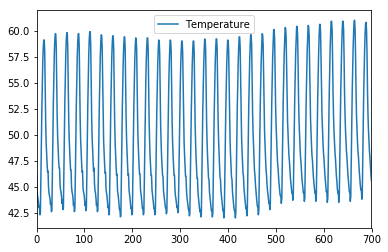

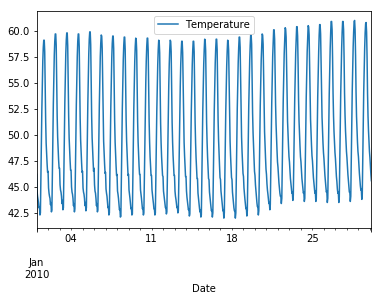

In [33]:
# Plot the raw data before setting the datetime index
df.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df.Date)

# Set the index to be the converted 'Date' column
df.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()


### Plotting date ranges, partial indexing

Now that you have set the DatetimeIndex in your DataFrame, you have a much more powerful and flexible set of tools to use when plotting your time series data. Of these, one of the most convenient is partial string indexing and slicing. In this exercise, we've pre-loaded a full year of Austin 2010 weather data, with the index set to be the datetime parsed 'Date' column as shown in the previous exercise.

Your job is to use partial string indexing of the dates, in a variety of datetime string formats, to plot all the summer data and just one week of data together. After you are done, you can cycle between the two plots by clicking on the 'Previous Plot' and 'Next Plot' buttons.

First, remind yourself how to extract one month of temperature data using 'May 2010' as a key into df.Temperature[], and call head() to inspect the result: df.Temperature['May 2010'].head().

In [34]:
df = pd.read_csv('weather.csv', index_col='Date', parse_dates=True)
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


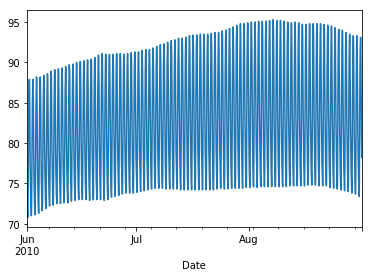

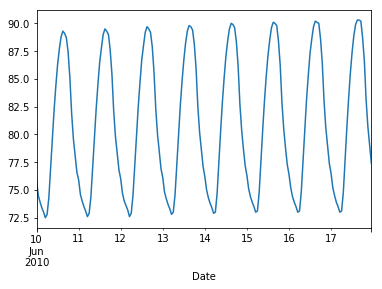

In [35]:
# Plot the summer data
df.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()